# Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_excel('IDataset2.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))
#print(X)
#print (y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 55)

# Calling the XGB Regressor

In [2]:
from xgboost import XGBRegressor
regressor = XGBRegressor(random_state = 55)

# Applying Grid Search to find the best model and the best parameters

In [5]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 200, 300, 400, 500,600, 700, 800, 900,1000, 1100, 1200, 1300, 1400, 1500],
               'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
               'gamma': [5, 4, 3, 2, 1, 0.1, 0.01, 0.001], 
               'learning_rate' : [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5] }]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

Best Accuracy: 0.9968334635532979
Best Parameters: {'gamma': 0.001, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 1300}


In [6]:
results_df = pd.DataFrame(grid_search.cv_results_)

from pathlib import Path
filepath1 = Path.cwd().parent
filepath2 = Path(filepath1/'Results/1D_XGB_Hyperparameter/xgb_impulse_hyperparameter.csv')  
filepath2.parent.mkdir(parents=True, exist_ok=True)
results_df.to_csv(filepath2)

# Training the XGB Regression model on the Training set

In [7]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators = 1300,
                         max_depth = 3,
                         gamma = 0.001, 
                         learning_rate = 0.2,
                         random_state = 55)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.001, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1300, n_jobs=None,
             num_parallel_tree=None, random_state=55, ...)

## Create a KFold object with 5 splits 

In [ ]:
#regressor.fit (X_train, y_train)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
print (scores)
print (scores.mean())

## Predicting the Test set results

In [8]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(file)

[[ 52.16  52.52]
 [282.8  284.67]
 [ 84.98  87.55]
 [  6.78   5.86]
 [169.12 169.2 ]
 [249.92 254.99]
 [236.69 244.78]
 [165.36 164.29]
 [114.95 116.46]
 [307.29 302.16]
 [ 30.72  30.1 ]
 [ 59.54  59.78]
 [ 85.45  84.28]
 [ 53.85  53.34]
 [237.   242.96]
 [380.54 392.18]
 [115.88 116.31]
 [ 21.42  21.94]
 [101.1  101.33]
 [256.66 262.29]
 [147.67 147.37]
 [121.31 121.86]
 [154.63 149.09]
 [ 17.58  17.69]
 [210.68 207.52]
 [ 77.95  77.58]
 [157.11 155.13]
 [149.37 148.77]
 [ 51.62  51.24]
 [156.8  159.3 ]
 [177.52 174.18]
 [ 31.2   31.08]
 [ 14.75  15.01]
 [ 37.4   37.87]
 [ 39.4   38.96]
 [ 39.15  39.29]
 [ 95.31  95.93]
 [337.16 341.12]
 [ 59.93  60.09]
 [ 63.48  63.44]
 [ 16.41  16.39]
 [ 24.41  25.14]
 [ 54.86  56.02]
 [ 77.74  77.68]
 [154.62 154.01]
 [ 38.68  37.99]
 [128.58 126.69]
 [  4.08   4.67]
 [103.35 105.09]
 [106.56 107.37]
 [302.06 293.02]
 [177.37 177.96]
 [ 94.59  93.68]
 [ 45.7   48.54]
 [ 98.19  99.87]
 [ 47.89  47.89]
 [ 11.27  11.41]
 [225.16 249.25]
 [ 31.62  31.1

## Evaluating the Model Performance

### R2

In [9]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9965173317370731


### Adjusted R2

In [10]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9964363394518888


### RMSE

In [11]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

5.18904438715316

### MAE

In [12]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

2.382701055315523

## Visualize

Text(0, 0.5, 'Predicted data')

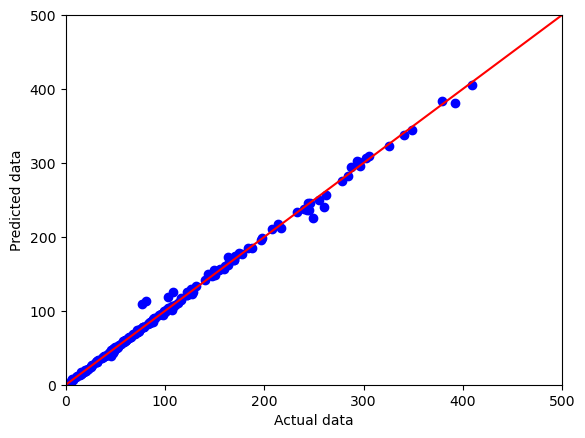

In [13]:
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,500],[0,500], color = "red")
plt.axis ([0,500,0,500])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

## Error percentage visualization

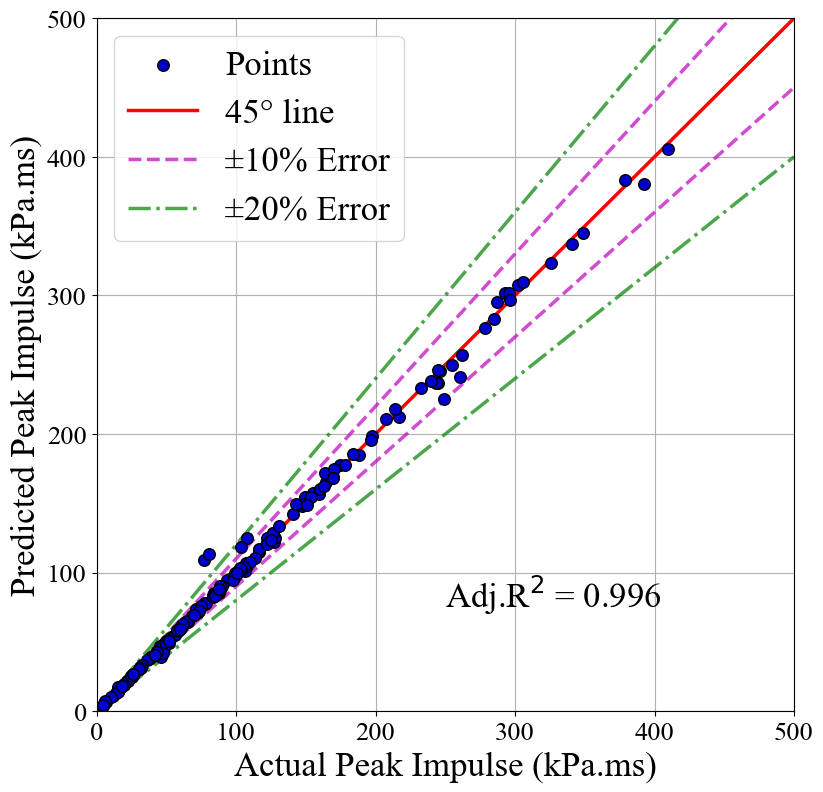

In [19]:
# Generate data

from sklearn.metrics import r2_score
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# Add scatterplot
ax.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Peak Impulse (kPa.ms)',fontsize = 25)
plt.xlabel('Actual Peak Impulse (kPa.ms)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,500)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 500)
plt.xlim(0, 500)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax.annotate("$R^2$ = {:.3f}".format(r2), (250, 100),fontsize = 25)  #Model is called here
ax.annotate("Adj.R$^2$ = {:.3f}".format(adj_r2), (250, 75),fontsize = 25)

plt.savefig('Images/plotX1.png', dpi = 600, bbox_inches = 'tight')

In [16]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))

Within 10% margin 94.35%
Within 20% margin 98.31%


## <100 Pa.s

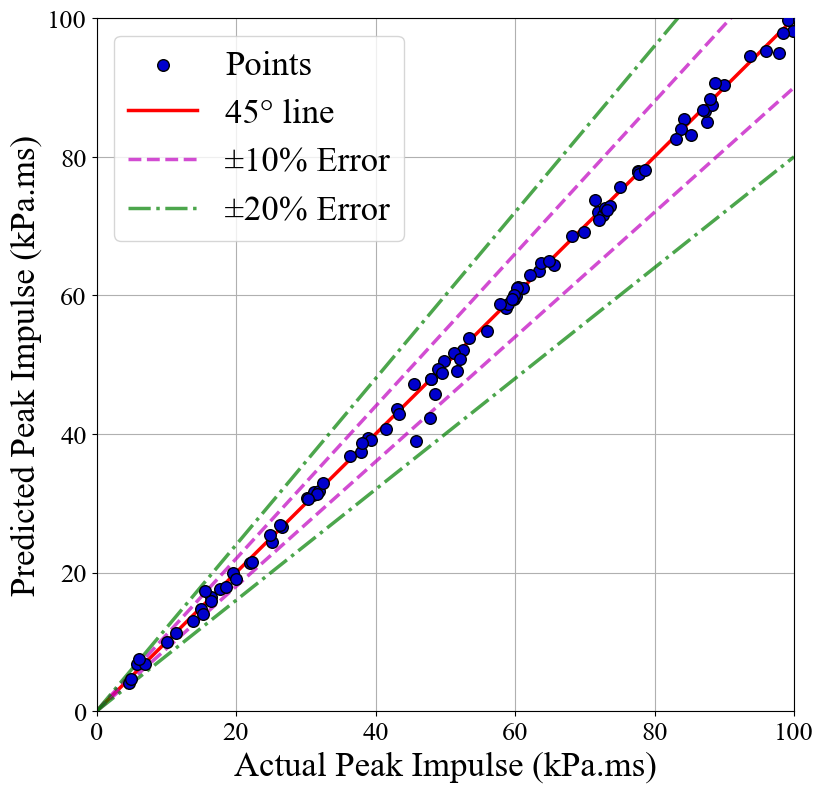

In [20]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, bx = plt.subplots(figsize = (9, 9))


# Add scatterplot
bx.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Impulse (kPa.ms)',fontsize = 25)
plt.xlabel('Actual Peak Impulse (kPa.ms)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,100)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 100)
plt.xlim(0, 100)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

bx.spines['left'].set_color('black')        # setting up Y-axis tick color to red
bx.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red

#ax.annotate("$R^2$ = {:.3f}".format(r2_score(y_test, y_pred)), (5000, 2000),fontsize = 25)  #Model is called here

plt.savefig('Images/plotX2.png', dpi = 600, bbox_inches = 'tight')

## Save the model to disk

In [18]:
import pickle
filename = 'finalized_model_XGB.sav'
pickle.dump(regressor, open(filename, 'wb'))

## Make new predictions

In [ ]:
%%timeit -r 1 -n 1
comp_data = pd.read_excel('ForPaperComparison.xlsx')
print (comp_data)
comp_data_pred = regressor.predict(comp_data)
print (comp_data_pred)